In [8]:
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
import os
import cv2
import math
import random
import numpy as np
from tqdm import tqdm
from pprint import pprint
random.seed(10)

In [42]:
ORI_BASE_DIR = r"F:\Minor Data Collection\Final Image Data\Monument Original 512\AUGMENTED_ANNOTATIONS"
annotation_path = 'Annotations'
jpg_image_path = 'JPEGImages'
ignore_list = ['kotilingeshvara', 'til mahadev narayan temple', 'king statue']
mistake_list = ['degutale temple', 'kritipur tower', 'degu tale']
background_count = 0

In [25]:
def xml_to_df(path):
    global background_count
    background_count = 0
    xml_list = []
    class_name = ''
    for xml_file in tqdm(glob.glob(path + '/*.xml')):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        if len(root.findall('object')) == 0:
            background_count += 1
        
        for member in root.findall('object'):
            class_name = member[0].text
            if class_name not in ignore_list:
                if class_name in mistake_list:
                    if class_name == 'degutale temple' or class_name == 'degu tale':
                        class_name = 'degu tale temple_KDS'
                    elif class_name == 'kritipur tower':
                        class_name = 'kirtipur tower'
                value = (root.find('filename').text,
                         int(root.find('size')[0].text),
                         int(root.find('size')[1].text),
                         class_name,
                         int(member[4][0].text),
                         int(member[4][1].text),
                         int(member[4][2].text),
                         int(member[4][3].text)
                         )
                xml_list.append(value)
    column_name = ['class count', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    return pd.DataFrame(xml_list, columns=column_name)

In [45]:
# Analyzes XMLs in an annotation file and gives a bar chart 
def xml_to_bar_chart(path, count_thres = 80, print_plot = None):
    global background_count
    df = xml_to_df(path)
    class_dict = dict(df.groupby(['class']).count()['class count'].items())
    x_label = list()
    y_label = list()
    x_label.append('background')
#     y_label.append(background_count)
    y_label.append(956)
    for key, value in class_dict.items():
        if value < count_thres and key not in ignore_list:
            x_label.append(key)
            y_label.append(value)
    
    plt.figure(figsize = (18, 5), dpi = 90)
    plt.style.use('seaborn-whitegrid')
    plt.bar(x_label, y_label, width = 0.75)
    plt.xticks(rotation = 90)
    plt.yticks(np.arange(0, max(y_label) + 50, 50))
    
    font_title = {'color': 'black', 'size': 18, 'weight': 'bold'}
    font_label = {'color': 'black', 'size': 14, 'weight': 'bold'}
    
    plt.xlabel('Monument Classes', fontdict = font_label)
    plt.ylabel('Classes Count', fontdict = font_label)
#     plt.title('Test Dataset', fontdict = font_title, pad = 15.0)
    
    save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Dataset Visualization\augmented_dataset_fixes.jpg"
    plt.savefig(save_loc, dpi = 160, bbox_inches = 'tight', pad_inches = 0.15)
    plt.show()

F:\Minor Data Collection\Final Image Data\Monument Original 512\AUGMENTED_ANNOTATIONS\Annotations


100%|██████████████████████████████████████████████████████████████████████████| 24849/24849 [00:02<00:00, 9074.52it/s]


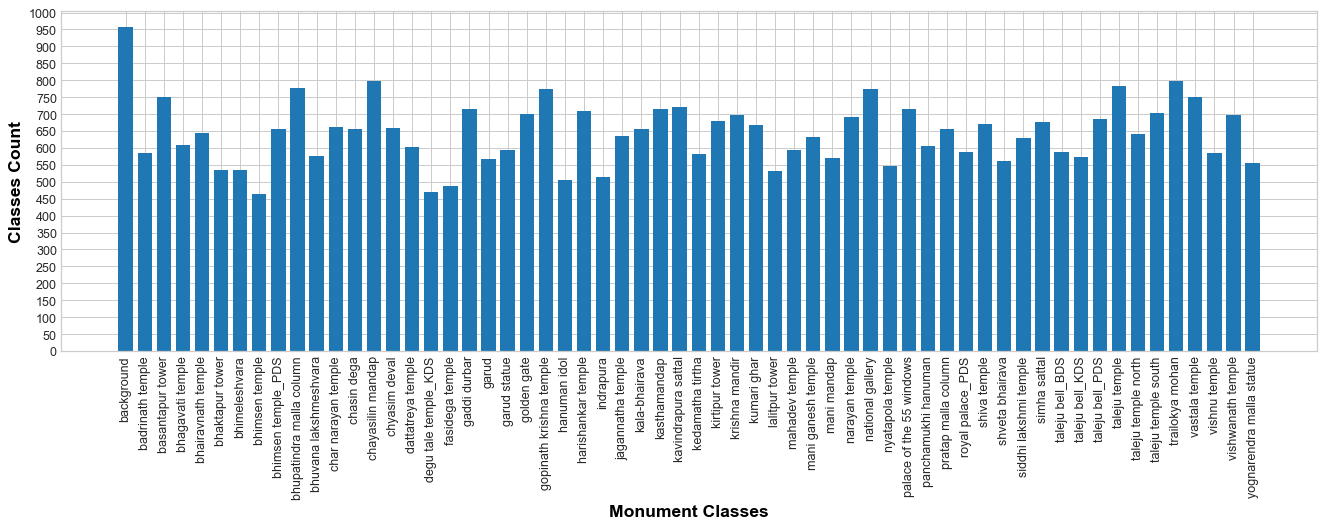

In [46]:
print(os.path.join(ORI_BASE_DIR, annotation_path))
xml_to_bar_chart(os.path.join(ORI_BASE_DIR, annotation_path), 5000)